<a href="https://colab.research.google.com/github/Hamilton-at-CapU/comp215/blob/main/lessons/week03-objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes and Objects
Our week 3 lesson workbook, available on Github from the Hamilton-at-CapU/comp215 repository.

As usual, the first code block just imports the modules we will use.

In [1]:
import math
import random

import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`
  * and every `object` has a `type`
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`
  * even a `function` is an `object`
  * an `object` has attributes, you can just add new attributes to any object (but don't!)

A little code to demonstrate...

In [6]:
# demo code
type(print)

dictionary = {'a':1, 'b':2}
print(type(dictionary))

def foo():
  return 'foo'

class Foo:
  def __init__(self):
    self.x = 0

f = Foo()
f.y = 5
print(f.y)

print(type(foo))
print(type(Foo))

def foobar(func):
  return func()

foobar(foo)

<class 'dict'>
5
<class 'function'>
<class 'type'>


'foo'

## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [10]:
class Circle:
    """ Representation for the data and operations on a circle """

    def __init__(self, center:tuple, radius:float):
      self.center = center
      self.radius = radius

    def getRadius(self):
      """ Return the radius of this circle """
      return self.radius

    def getCenter(self):
      """ Return the center of this circle """
      return self.center

    def getCenterX(self):
      """ Return the x center of this circle """
      return self.center[0]

    def getCenterY(self):
      """ Return the y center of this circle """
      return self.center[1]

    def area(self):
      """ Return the area of this circle """
      return math.pi*self.radius**2

    def move(self, offset):
      """ Move this circle by given (x,y) offset """
      self.center = (self.center[0]+offset[0], self.center[1]+offset[1])

    def distance_center(self, other):
      """ Return the distance between this circle center and the other one """
      return math.sqrt( (self.center[0] - other.getCenterX())**2 + (self.center[1] - other.getCenterY())**2 )

    def distance_edge(self, other):
      """ Return the distance between this circle edge and the other one """
      return self.distance_center(other) - (self.radius + other.getRadius())

    def intersects(self, other):
      """ Return True iff this circle intersects the other one """
      return self.distance_edge(other) <= 0


In [11]:
# Test Circle class
c1 = Circle((1,1),2)
c2 = Circle((2,2),3)

assert c1.getRadius() == 2
assert c1.intersects(c2) == True

## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


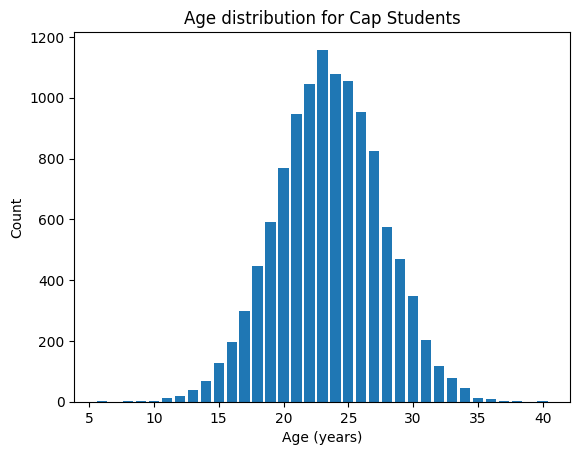

In [12]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
_, ax = plt.subplots()
ax.set(
    title="Age distribution for Cap Students",
    xlabel='Age (years)',
    ylabel='Count',
)

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.show()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [13]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

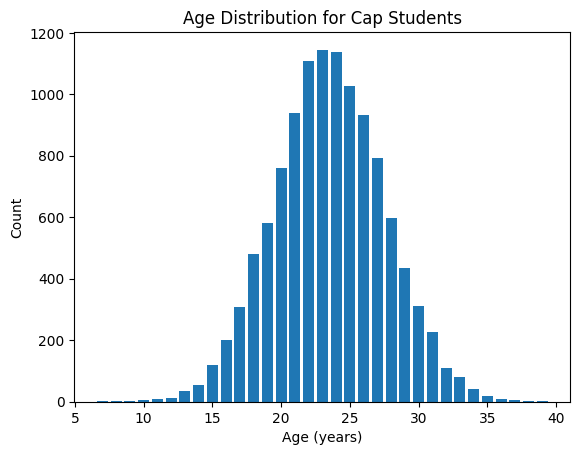

In [14]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()

# Scatter plot
Create a Scatter class that abstracts the creation of a scatter plot...